# Análise de Voos (voos.csv)
Este notebook investiga a relação entre **preço** e **distância** das rotas presentes no arquivo `voos.csv`. O objetivo é avaliar a eficiência econômica dos voos e identificar oportunidades ou anomalias, auxiliando consumidores e gestores a entenderem melhor o mercado aéreo.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,6)
sns.set(style='whitegrid')

## Carregamento dos dados

In [4]:
df = pd.read_csv('./datasets/voos.csv')
print(f'Total de registros: {len(df)}')
df.head()

Total de registros: 142


,is_best,cia,departure,arrival,duration,stops,price,origem (IATA),origem (ICAO),origem,destino,destino (ICAO),destino (IATA),distancia
0,True,Gol,"3:50 PM on Fri, Sep 19","6:45 PM on Fri, Sep 19",2 hr 55 min,0,1675,AEP,SABE,Aeroparque,Galeão,SBGL,GIG,1968.49
1,True,Gol,"10:25 PM on Fri, Sep 19","11:55 PM on Fri, Sep 19",1 hr 30 min,0,1325,AEP,SABE,Aeroparque,Porto Alegre,SBPA,POA,849.38
2,True,Gol,"4:35 PM on Fri, Sep 19","7:00 PM on Fri, Sep 19",2 hr 25 min,0,643,AJU,SBAR,Aracaju,Galeão,SBGL,GIG,1464.15
3,True,Gol,"7:55 PM on Fri, Sep 19","10:40 PM on Fri, Sep 19",2 hr 45 min,0,597,AJU,SBAR,Aracaju,Guarulhos,SBGR,GRU,1700.91
4,True,Gol,"12:35 PM on Fri, Sep 19","1:25 PM on Fri, Sep 19",50 min,0,329,AJU,SBAR,Aracaju,Salvador,SBSV,SSA,252.55


## Limpeza e pré-processamento

In [6]:
# Verificar valores ausentes
print(df.isnull().sum())

# Criar coluna de rota simplificada
df['rota'] = df['origem (IATA)'] + '-' + df['destino (IATA)']

# Calcular preço por km
df['preco_por_km'] = df['price'] / df['distancia']

# Visão geral das estatísticas
df[['price','distancia','preco_por_km']].describe()
df[['price','distancia','preco_por_km']].to_csv('./datasets/voos_processado.csv', index=False)

is_best           0
cia               0
departure         0
arrival           0
duration          0
stops             0
price             0
origem (IATA)     0
origem (ICAO)     0
origem            0
destino           0
destino (ICAO)    0
destino (IATA)    0
distancia         0
rota              0
preco_por_km      0
dtype: int64


## Preço vs Distância

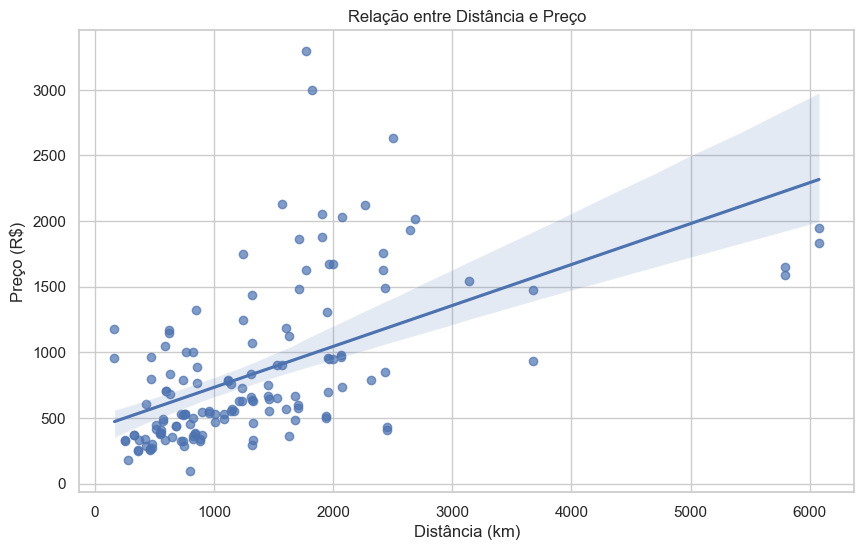

In [7]:
sns.regplot(data=df, x='distancia', y='price', scatter_kws={'alpha':0.7});
plt.title('Relação entre Distância e Preço');
plt.xlabel('Distância (km)');
plt.ylabel('Preço (R$)');
plt.show()

## Preço por km vs Distância

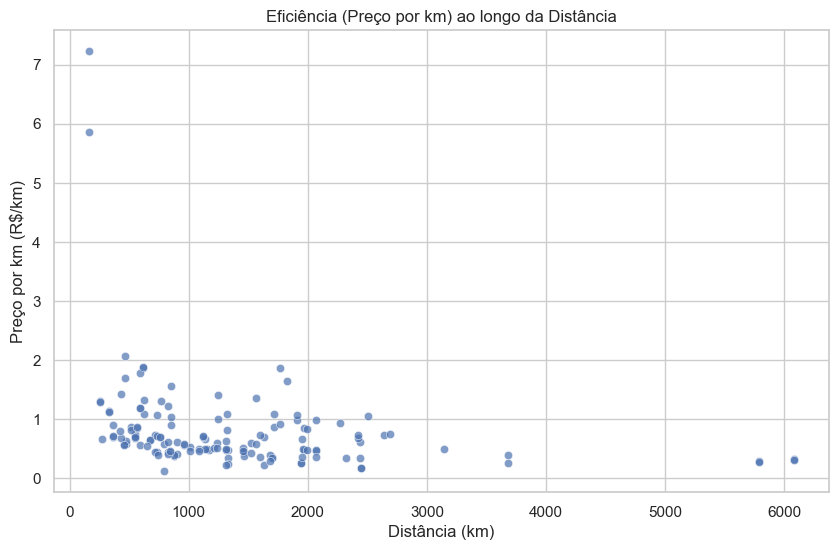

In [8]:
sns.scatterplot(data=df, x='distancia', y='preco_por_km', alpha=0.7);
plt.title('Eficiência (Preço por km) ao longo da Distância');
plt.xlabel('Distância (km)');
plt.ylabel('Preço por km (R$/km)');
plt.show()

## Distribuição do Preço por km

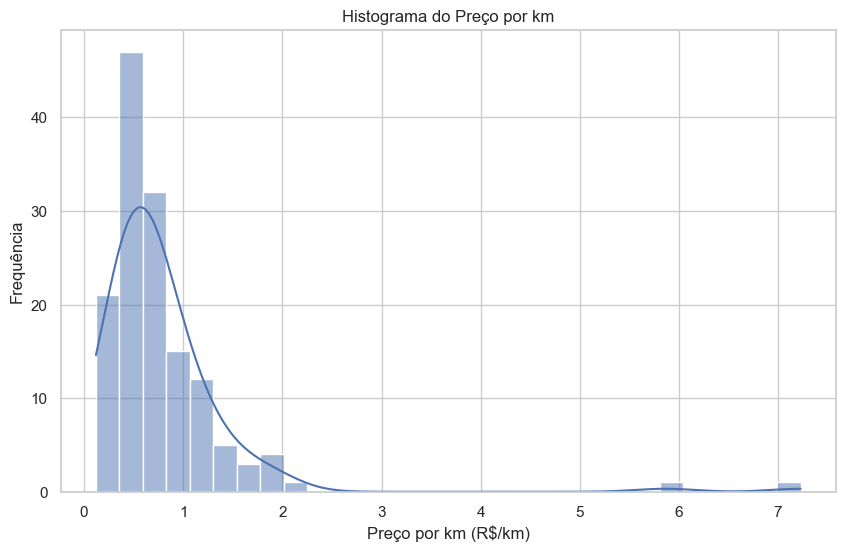

In [9]:
sns.histplot(df['preco_por_km'], bins=30, kde=True);
plt.title('Histograma do Preço por km');
plt.xlabel('Preço por km (R$/km)');
plt.ylabel('Frequência');
plt.show()

## Rotas extremas em custo por km

In [10]:
top_caras = df.sort_values('preco_por_km', ascending=False).head(10)
baratas = df.sort_values('preco_por_km', ascending=True).head(10)

print('Mais caras por km:')
display(top_caras[['rota','price','distancia','preco_por_km']])

print('Mais baratas por km:')
display(baratas[['rota','price','distancia','preco_por_km']])

Mais caras por km:


,rota,price,distancia,preco_por_km
15,BSB-GYN,1178,163.00,7.226994
85,GYN-BSB,955,163.00,5.858896
136,SSA-MCZ,965,466.51,2.068552
90,PMW-BSB,1167,619.05,1.885147
20,BSB-NAT,3294,1768.55,1.862543
21,BSB-PMW,1151,619.05,1.859301
64,MAO-STM,1052,589.36,1.784987
65,MCZ-SSA,795,466.51,1.704144
118,MVD-GIG,3002,1821.80,1.647821
1,AEP-POA,1325,849.38,1.559961


Mais baratas por km:


,rota,price,distancia,preco_por_km
94,VCP-BSB,95,794.44,0.119581
79,GRU-BEL,409,2449.25,0.166990
8,BEL-GRU,432,2449.25,0.176381
139,SSA-SLZ,294,1314.33,0.223688
110,CNF-CKS,365,1630.87,0.223807
96,GRU-CGB,330,1328.46,0.248408
81,BSB-BOG,932,3677.55,0.253430
103,MCZ-CGH,501,1943.16,0.257827
33,CGH-MCZ,512,1943.16,0.263488
88,MIA-BSB,1587,5791.75,0.274010


## Conclusões
- A relação entre preço e distância apresenta correlação moderada, indicando que voos mais longos tendem a ser mais caros, mas com grande variabilidade.
- Observa-se forte penalização em rotas muito curtas (ex.: BSB-GYN), com custo por km muito acima da média, sugerindo influência de custos fixos e taxas.
- Nas faixas acima de 2000 km o preço por km tende a estabilizar abaixo de 0,5 R$/km, mostrando maior eficiência em distâncias longas.
- Foram identificadas rotas atípicas (tanto baratas quanto caras) que podem representar oportunidades ou sinalizar distorções de mercado.
- A análise pode ser complementada futuramente com dados de ocupação das aeronaves para estudar elasticidade de demanda e viabilidade econômica.